# <font color ="000ff"> Transformada Rápida de Fourier</font>

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$ sendo $W_N = e^{-j\frac{2\pi}{N}}$ e para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$.

Text(0, 0.5, 'O(N^2)')

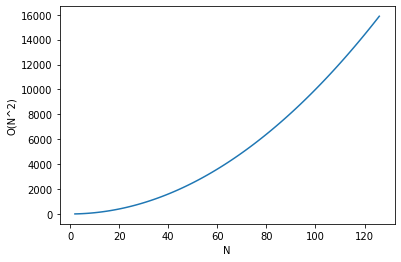

In [4]:
import numpy as np
import matplotlib.pyplot as mplib
N = 128;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.xlabel("N")
mplib.ylabel("O(N^2)")

Em 1965, é proposto um algoritmo rápido que reduz a complexidade do cálculo da DFT para $O(N.log_2 N)$.

Text(0, 0.5, 'O(N^2)')

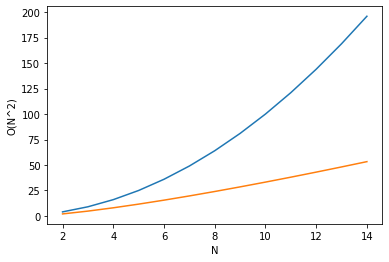

In [5]:
import numpy as np

import matplotlib.pyplot as mplib
N = 16;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.plot(n, n*np.log2(n))
mplib.xlabel("N")
mplib.ylabel("O(N^2)")

Esses algoritmos ficaram conhecidos como **Transformada Rápida de Fourier**, ou simplesmente **FFT** de *Fast Fourier Transform*.

Para entender os algoritmos da FFT consideremo o termo $W_N = e^{-j\frac{2\pi}{N}}$, que tem:

1. $|W_N| = |e^{-j\frac{2\pi}{N}}|$;
2. $\angle W_N = arctg(\frac{2\pi}{N})$.

E que pode ser interpretado como a divisão do círculo unitário em $N$ seções, cada uma com ângulo $\angle W_N$. 

Os Algoritmos da FFT exploram esse fato, aplicando as seguintes relações:

1. Simetria complexa conjugada: $W_N^{k(N-n)} = W_n^{-kn} = (W_N^{kn})^*$, ($()^*$ significa o conjugado complexo), e;
2. Periodicidade em $k$ e $n$: $W_N^{kn} = W_N^{k(N + n)} = W_N^{(k + N)n}$.

E a decomposição de uma DFT de $N$ pontos em DFTs de tamanhos menores.

Classes básicas:
    
1. FFT com decimação no tempo: $x(n)$ é sucessivamente decomposto em sequências menores
2. FFT com decimação em frequência : $X[k]$ é decomposto em sequências menores
    
Algoritmos:
    
1. Goertzel(1958): $O(N^2)$
2. **Cooley-Tukey(1965): Deu origem à decimação no tempo**
3. Sande-Tukey(1966): Deu origem à decimação em frequência


## FFT por Decimação no tempo

Decomposição sucessiva de $x(n)$ em tamanhos menores, e para tanto se convenciona utilizar $N = 2^l$, sendo $l$ um inteiro positivo.

### Algoritmo Raiz de 2 com decimação no tempo

O sinal $x(n)$ de $N$ pontos é dividido em 2 sequências de $N/2$ pontos, uma relativa aos índices **pares** e outra relativa aos índices **impares**, assim

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn}$$

após a divisão

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

fazendo:
$n = 2r$ para $n$ par, e;

$n = (2r + 1)$ para $n$ ímpar,

temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{k2r} + \sum\limits_{r=0}^{N/2-1}x(2r+1)W_N^{k(2r+1)}$

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_N^2)^{k r}$

Como $W_N^2 = W_{N/2}$ temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$

representando as componentes pares e ímpares de $x(n)$ por

$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$, e

$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$

Temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

Vamos chamar:

$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$,e 

$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

cada uma sendo uma DFT de $N/2$ pontos

e

$X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

###  <center><font color=#0000ff> Para $N = 2$ </font></center>

pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_2^{0} = x(0) + x(1)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_2^{1} = x(0) - x(1)$

Usando e FFT temos 

$X[0] = X_e[0] + W_2^0 X_o[0]$

$X[1] = X_e[1] + W_2^1 X_o[1]$

representado na figura a seguir.

![title](img/FFTN2.png)

###  <center><font color=#0000ff>Para $N = 4$ </font></center>

Lembrando

$X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

Usando e FFT temos 

$X[0] = X_e[0] + W_4^0 X_o[0] $ 

$X[1] = X_e[1] + W_4^1 X_o[1]$ 

$X[2] = X_e[2] + W_4^2 X_o[2] = X_e[0] + W_4^2 X_o[0]$      <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

$X[2] = X_e[3] + W_4^3 X_o[3] = X_e[1] + W_4^2 X_o[1]$       <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

![title](img/TrelicaFFTN4.png)

Observando as duas estruturas acima, vemos que para uma FFT de tamanho $N$, são necessários $\log_2(N)$ estágios, e em cada estágio, a partir dos valores do ainsl, são realizadas DFTs de tamanhos $2, 4, 8, ..., N$.

Para o primeiro estágio, FFT de tamanho $N_1 = 2$, para calcular $X_e[k]$ $k = 0, 1$ usa-se as posições de entrada 0 (quen contém $x(0)$) e 1 (que contém $x(2)$), já $X_o[k]$ usa as posições 2 (que contém $x(1)$) e 3 (que contém $x(3)$), houve um deslocamento de $N_1/2$ na posições de entrada.

No segundo estágio, FFTs de tamanho $N_2 = 4$ e nesse caso já o resultado da FFT, $X[k],\ k = 0,1 2,3$ para cada $k$, envolve as **posições anteriores** $k$ e $(k+ N_2/2) mod\ N_2$

Pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{3}x(n)W_4^{0} = x(0) + x(1) + x(2) + x(3) = x(0) + x(2) + x(1) + x(3)$

$X[1] = \sum\limits_{n=0}^{3}x(n)W_4^{n} = x(0) + x(1)W_4^{1}  + x(2)W_4^{2} + x(3)W_4^{3} =  
x(0) - x(2) -j[x(1) - x(3)]$

$X[2] = \sum\limits_{n=0}^{3}x(n)W_4^{2n} = x(0) + x(1)W_4^{2} + x(2W_4^{4}) + x(3)W_4^{6} = x(0) + x(2) -[x(1) + x(3)]$

$X[3] = \sum\limits_{n=0}^{3}x(n)W_4^{3n} = x(0) + x(1)W_4^{3} + x(2)W_4^{6} + x(3)W_4^{9} = x(0) - x(2) + j[x(1) - x(3)]$

$X_e[k] = \sum\limits_{r=0}^{1}x_e(n)(W_{2})^{k r}$, e $X_o[k] = \sum\limits_{r=0}^{1}x_o(n)(W_{2})^{k r}$

e

$X_e[0] = x(0) + x(2)$, e $X_e[1] = x(0) - x(2)$

$X_o[0] = x(1) + x(3)$, e $X_e[1] = x(1) - jx(3)$

###  <center><font color=#0000ff>  N = 8 </font></center>

Para $N = 8$ vamos usar a borboleta otimizada mostrada na Figura abaixo (Fig. 9.12, pp.431 Livro Texto)

Sendo 

$X_m[p] = X_{m-1}[p] + W_N^rX_{m-1}[q]$

$X_m[q] = X_{m-1}[p] - W_N^r X_{m-1}[q]$

Precisamos avaliar como variam $m$, $p$, $q$ e $r$. Inicialmente, vamos atribuir os valore do sinal $x(n)$ ao estágio inicial da treliça, usando a sequência obtida pela inversão da ordem dos bits dos índices de $x(n)$, ou seja:

$X_0[0] = x(0)$

$X_0[1] = x(4)$

$X_0[2] = x(2)$

$X_0[3] = x(6)$

$X_0[4] = x(1)$

$X_0[5] = x(5)$

$X_0[6] = x(3)$

$X_0[7] = x(7)$

e representara a treliça, que tem $log_2(N)$ estágios, no para $N = 8$ teremos 3 estágios, qu estão representados a seguir.

![title](img/FFTN8peq.png)

Repetindo a treliça apresentando somente os valore de $p$ e $q$ em cada estágio.

**Questão:** Como implementar um código para um $N$ qualquer?